In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [25]:

df = pd.read_csv('dataset.csv')
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


### Partie Analyse :

1. **Vérifiez les informations manquantes et les doublons** (outil : `missingno`).


In [26]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
1333    False
1334    False
1335    False
1336    False
1337    False
Length: 1338, dtype: bool

In [27]:
df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

Modifier les valeurs texte en int

In [28]:
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [29]:
df["sex"] = df["sex"].str.replace("female", '1')
df["sex"] = df["sex"].str.replace("male", '0')
df


,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,yes,southwest,16884.92400
1,18,0,33.770,1,no,southeast,1725.55230
2,28,0,33.000,3,no,southeast,4449.46200
3,33,0,22.705,0,no,northwest,21984.47061
4,32,0,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,0,30.970,3,no,northwest,10600.54830
1334,18,1,31.920,0,no,northeast,2205.98080
1335,18,1,36.850,0,no,southeast,1629.83350
1336,21,1,25.800,0,no,southwest,2007.94500


In [30]:
df["sex"] = df["sex"].astype(int)
df.dtypes

age           int64
sex           int64
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [31]:
df["smoker"] = df["smoker"].str.replace("yes", '1')
df["smoker"] = df["smoker"].str.replace("no", '0')
df["smoker"] = df["smoker"].astype(int)
df.dtypes

age           int64
sex           int64
bmi         float64
children      int64
smoker        int64
region       object
charges     float64
dtype: object

In [32]:
grouped = df.groupby("region")
grouped.groups

# df["region"].unique()
# 4 regions : northeast, northwest, southeast, southwest

{'northeast': [8, 10, 16, 17, 20, 23, 26, 31, 38, 40, 44, 46, 50, 56, 60, 71, 78, 80, 81, 92, 98, 101, 102, 114, 115, 121, 123, 125, 130, 131, 134, 140, 141, 152, 153, 154, 157, 165, 169, 172, 179, 182, 185, 199, 205, 207, 209, 221, 228, 229, 240, 241, 244, 249, 250, 254, 255, 262, 267, 269, 273, 275, 280, 281, 282, 283, 286, 288, 291, 295, 300, 301, 308, 315, 317, 319, 321, 323, 325, 330, 333, 334, 338, 342, 343, 347, 353, 360, 365, 366, 369, 371, 372, 376, 380, 381, 384, 390, 392, 393, ...], 'northwest': [3, 4, 7, 9, 24, 27, 28, 33, 35, 36, 47, 51, 54, 55, 59, 62, 63, 64, 67, 75, 79, 83, 85, 86, 88, 89, 91, 93, 105, 107, 110, 113, 119, 122, 124, 128, 133, 137, 143, 144, 146, 148, 150, 155, 160, 164, 167, 168, 174, 176, 180, 183, 189, 193, 195, 198, 200, 202, 211, 212, 216, 230, 234, 238, 245, 256, 258, 259, 263, 272, 274, 276, 287, 298, 299, 305, 309, 316, 318, 320, 327, 331, 332, 337, 341, 349, 350, 357, 367, 368, 370, 375, 378, 387, 388, 389, 391, 395, 402, 403, ...], 'southeast': 

In [33]:
df["is_northeast"] = [1 if region == "northeast" else 0 for region in df["region"]]
df

,age,sex,bmi,children,smoker,region,charges,is_northeast
0,19,1,27.900,0,1,southwest,16884.92400,0
1,18,0,33.770,1,0,southeast,1725.55230,0
2,28,0,33.000,3,0,southeast,4449.46200,0
3,33,0,22.705,0,0,northwest,21984.47061,0
4,32,0,28.880,0,0,northwest,3866.85520,0
...,...,...,...,...,...,...,...,...
1333,50,0,30.970,3,0,northwest,10600.54830,0
1334,18,1,31.920,0,0,northeast,2205.98080,1
1335,18,1,36.850,0,0,southeast,1629.83350,0
1336,21,1,25.800,0,0,southwest,2007.94500,0


In [34]:
df["is_northwest"] = [1 if region == "northwest" else 0 for region in df["region"]]

df["is_southeast"] =[1 if region == "southeast" else 0 for region in df["region"]]

df["is_southwest"] =[1 if region == "southwest" else 0 for region in df["region"]]

df


,age,sex,bmi,children,smoker,region,charges,is_northeast,is_northwest,is_southeast,is_southwest
0,19,1,27.900,0,1,southwest,16884.92400,0,0,0,1
1,18,0,33.770,1,0,southeast,1725.55230,0,0,1,0
2,28,0,33.000,3,0,southeast,4449.46200,0,0,1,0
3,33,0,22.705,0,0,northwest,21984.47061,0,1,0,0
4,32,0,28.880,0,0,northwest,3866.85520,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1333,50,0,30.970,3,0,northwest,10600.54830,0,1,0,0
1334,18,1,31.920,0,0,northeast,2205.98080,1,0,0,0
1335,18,1,36.850,0,0,southeast,1629.83350,0,0,1,0
1336,21,1,25.800,0,0,southwest,2007.94500,0,0,0,1


In [35]:
df.isna().sum()

age             0
sex             0
bmi             0
children        0
smoker          0
region          0
charges         0
is_northeast    0
is_northwest    0
is_southeast    0
is_southwest    0
dtype: int64

In [36]:
df.dtypes

age               int64
sex               int64
bmi             float64
children          int64
smoker            int64
region           object
charges         float64
is_northeast      int64
is_northwest      int64
is_southeast      int64
is_southwest      int64
dtype: object

2. **Détection des valeurs aberrantes.**


In [37]:
df.describe()

,age,sex,bmi,children,smoker,charges,is_northeast,is_northwest,is_southeast,is_southwest
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,0.494768,30.663397,1.094918,0.204783,13270.422265,0.242152,0.242900,0.272048,0.242900
std,14.049960,0.500160,6.098187,1.205493,0.403694,12110.011237,0.428546,0.428995,0.445181,0.428995
min,18.000000,0.000000,15.960000,0.000000,0.000000,1121.873900,0.000000,0.000000,0.000000,0.000000
25%,27.000000,0.000000,26.296250,0.000000,0.000000,4740.287150,0.000000,0.000000,0.000000,0.000000
50%,39.000000,0.000000,30.400000,1.000000,0.000000,9382.033000,0.000000,0.000000,0.000000,0.000000
75%,51.000000,1.000000,34.693750,2.000000,0.000000,16639.912515,0.000000,0.000000,1.000000,0.000000
max,64.000000,1.000000,53.130000,5.000000,1.000000,63770.428010,1.000000,1.000000,1.000000,1.000000


3. **Analyse univariée :** Analysez chaque variable indépendamment.


<Axes: ylabel='Frequency'>

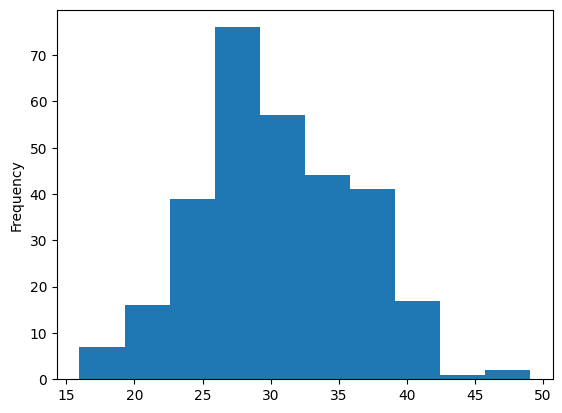

In [38]:
df1 = df.head(300)
df1["bmi"].plot(kind='hist')

<Axes: ylabel='Frequency'>

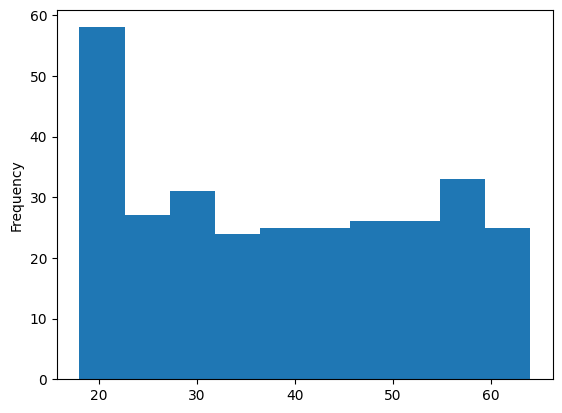

In [39]:
df1 = df.head(300)
df1["age"].plot(kind='hist')

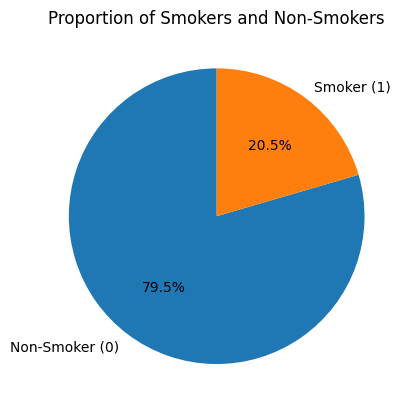

In [40]:
import matplotlib.pyplot as plt
smoker_counts = df["smoker"].value_counts()

# Define labels for the categories
labels = ["Non-Smoker (0)", "Smoker (1)"]

# Plot the pie chart
smoker_counts.plot(kind='pie', labels=labels, autopct='%1.1f%%', startangle=90)
plt.title("Proportion of Smokers and Non-Smokers")
plt.ylabel('')
plt.show()

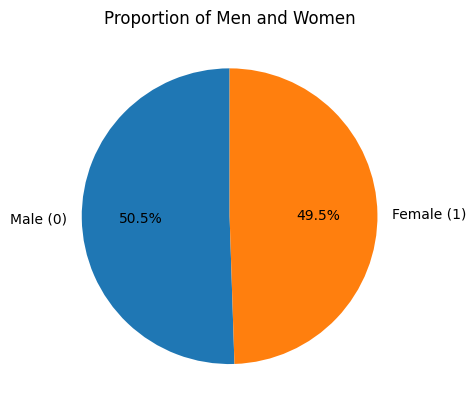

In [41]:
smoker_counts = df["sex"].value_counts()

# Define labels for the categories
labels = ["Male (0)", "Female (1)"]

# Plot the pie chart
smoker_counts.plot(kind='pie', labels=labels, autopct='%1.1f%%', startangle=90)
plt.title("Proportion of Men and Women")
plt.ylabel('')
plt.show()

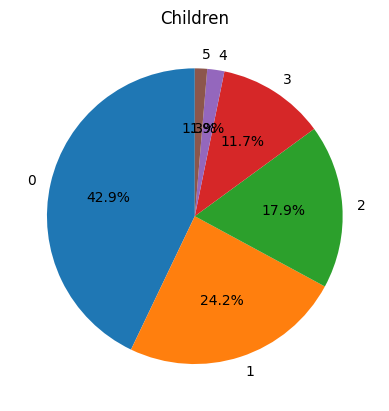

In [42]:
smoker_counts = df["children"].value_counts()

# Define labels for the categories
labels = ["0", "1", "2", "3", "4", "5"]

# Plot the pie chart
smoker_counts.plot(kind='pie', labels=labels, autopct='%1.1f%%', startangle=90)
plt.title("Children")
plt.ylabel('')
plt.show()

4. **Corrélation des variables :** Étudiez les corrélations avec la variable cible.


In [43]:
df1 = df.drop("region", axis=1)
correlations = df1.corr()["charges"].sort_values(ascending=False)
print(correlations)


charges         1.000000
smoker          0.787251
age             0.299008
bmi             0.198341
is_southeast    0.073982
children        0.067998
is_northeast    0.006349
is_northwest   -0.039905
is_southwest   -0.043210
sex            -0.057292
Name: charges, dtype: float64


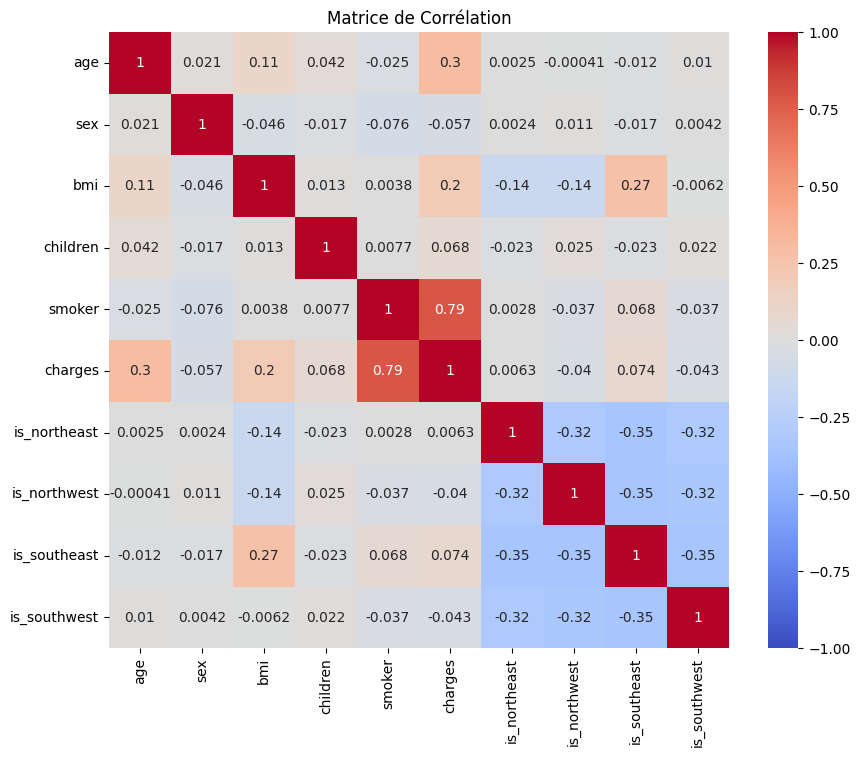

In [44]:
# Calcul de la matrice de corrélation
corr_matrix = df1.corr()

# Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Matrice de Corrélation")
plt.show()


5. **Analyse bivariée :** Exemple : interaction entre sexe et fumeur.


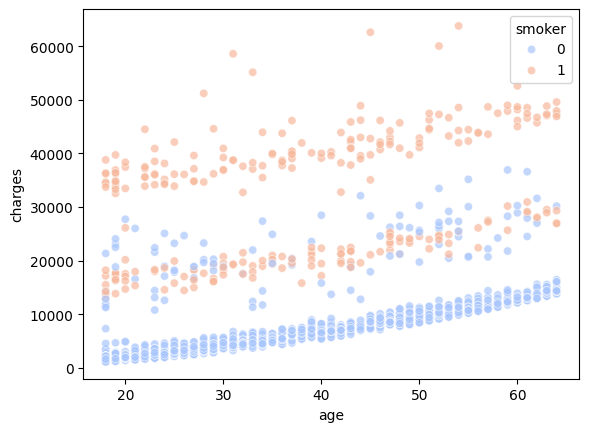

In [45]:
sns.scatterplot(x='age', y='charges', hue='smoker', data=df1, palette='coolwarm', alpha=0.7)
plt.xlabel('age')
plt.ylabel('charges')
plt.show()
#concluant lien entre les charge et smoker

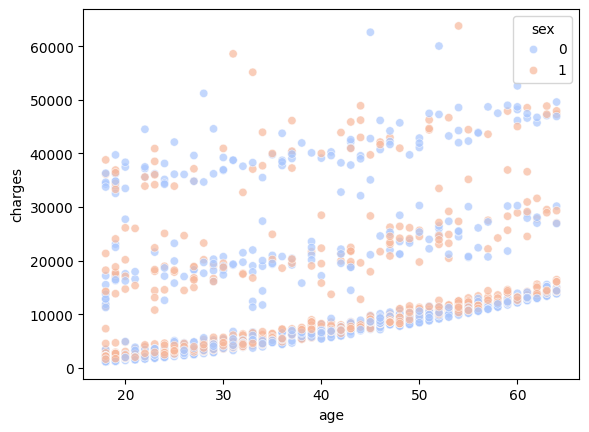

In [46]:
sns.scatterplot(x='age', y='charges', hue='sex', data=df1, palette='coolwarm', alpha=0.7)
plt.xlabel('age')
plt.ylabel('charges')
plt.show()
#non concluant

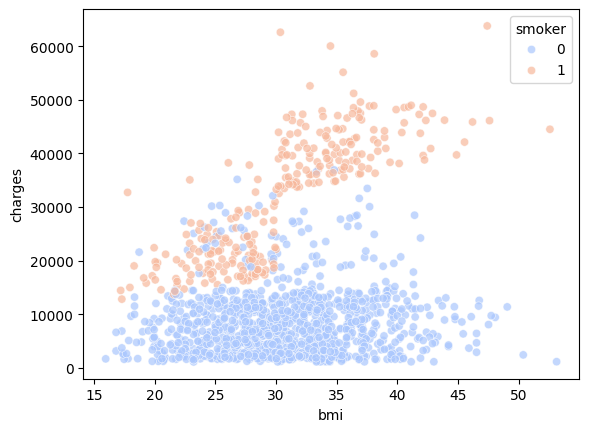

In [47]:
sns.scatterplot(x='bmi', y='charges', hue='smoker', data=df1, palette='coolwarm', alpha=0.7)
plt.xlabel('bmi')
plt.ylabel('charges')
plt.show()
#concluant lien entre les charges smoker et bmi

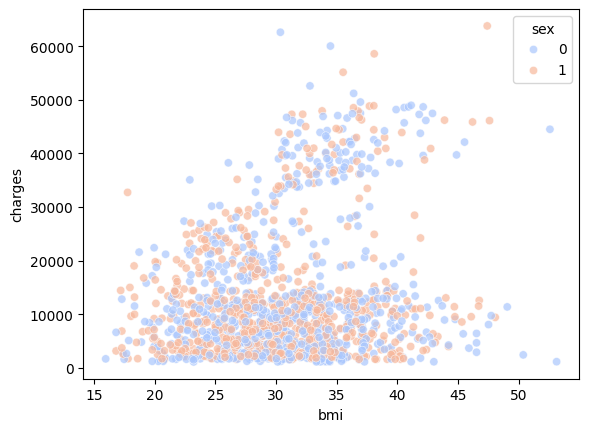

In [48]:
sns.scatterplot(x='bmi', y='charges', hue='sex', data=df1, palette='coolwarm', alpha=0.7)
plt.xlabel('bmi')
plt.ylabel('charges')
plt.show()
#non concluant 

6. **Visualisations graphiques :**
    - Utilisez des box plots ou violin plots (outil : `seaborn`).


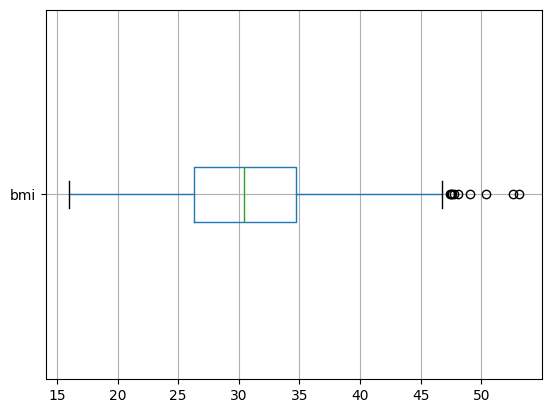

In [49]:
# df.boxplot(column="charges", vert=False)
df.boxplot(column="bmi", vert=False)
plt.show()

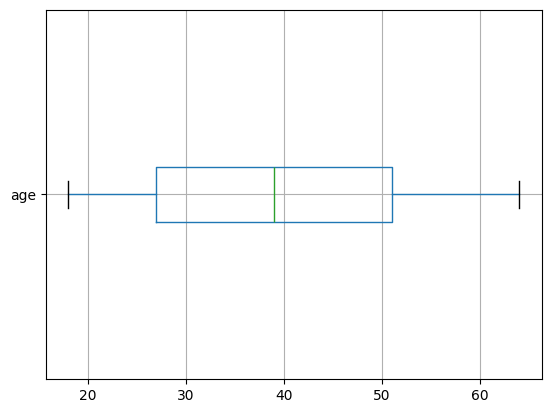

In [50]:
df1.boxplot(column="age", vert=False)
plt.show()

7. **Validation des hypothèses :** Utilisez des tests statistiques.


In [51]:
from scipy import stats

# Test t de Student pour comparer les moyennes des charges entre fumeurs et non-fumeurs
fumeurs = df[df['smoker'] == 'yes']['charges']
non_fumeurs = df[df['smoker'] == 'no']['charges']

t_stat, p_value = stats.ttest_ind(fumeurs, non_fumeurs)

print(f'T-Statistic: {t_stat}, P-Value: {p_value}')


T-Statistic: nan, P-Value: nan


/Users/khadijaaassi/Desktop/Simplon/Projet_devIA/Simplon_Machine_learning/.venv/lib/python3.12/site-packages/scipy/_lib/deprecation.py:234: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  return f(*args, **kwargs)


8. **Visualisations :** Appuyez chaque point par des graphiques pertinents.

Modélisation: faire une régression linéaire ici.

Cours : 
- Reprendre le cours sur open classroom du début https://openclassrooms.com/fr/courses/7410486-nettoyez-et-analysez-votre-jeu-de-donnees/7460486-comprenez-les-mesures-de-dispersion
- Cours scikitlearn revoir pour la suite



In [52]:

df1 = df1.drop('sex', axis=1)


In [53]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Séparer les variables explicatives (X) et la variable cible (y)
X = df1.drop(columns='charges')
y = df1['charges']


# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Créer et entraîner le modèle de régression linéaire
model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)


# Évaluer les performances
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)


print(f'Erreur quadratique moyenne (MSE) : {mse:.2f}')
print(f'Coefficient de détermination (R²) : {r2:.2f}')
print(f'Coefficients du modèle : {model.coef_}')
print(f'Intercept du modèle : {model.intercept_}')


Erreur quadratique moyenne (MSE) : 33602504.51
Coefficient de détermination (R²) : 0.78
Coefficients du modèle : [  256.98131191   337.05783156   425.15748151 23649.49372575
   459.46423996    88.56133722  -198.00560703  -350.01997015]
Intercept du modèle : -12399.022163836895


In [54]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [55]:

param_grid = {'alpha': [0.01, 0.1, 1, 10]}
grid_search = GridSearchCV(Lasso(), param_grid, cv=5, scoring='r2')
grid_search.fit(X_train, y_train)

print(f'Meilleur paramètre : {grid_search.best_params_}')
print(f'Meilleur score R² : {grid_search.best_score_}')


Meilleur paramètre : {'alpha': 10}
Meilleur score R² : 0.7343051992162499


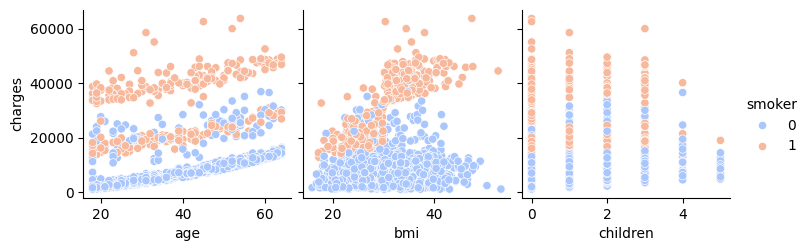

In [56]:

sns.pairplot(df, x_vars=['age', 'bmi', 'children'], y_vars='charges', hue='smoker', palette='coolwarm')
plt.show()


In [57]:


scores = cross_val_score(model, X, y, cv=5, scoring='r2')
print(f'Scores R² sur 5 plis : {scores}')
print(f'R² moyen : {scores.mean()}')


Scores R² sur 5 plis : [0.76195041 0.70652951 0.77875207 0.732674   0.75589773]
R² moyen : 0.7471607451303276


Score R² : 0.78
Erreur quadratique moyenne (MSE) : 33681139.20
Erreur absolue moyenne (MAE) : 4191.38
Coefficients du modèle Lasso :
age               256.949377
bmi               335.128957
children          419.546432
smoker          23586.339203
is_northeast      570.537729
is_northwest      197.159113
is_southeast       -0.000000
is_southwest     -157.136814
dtype: float64


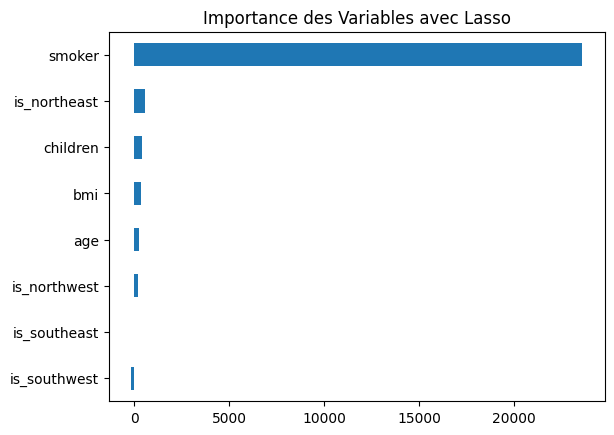

In [58]:

# Créer et entraîner le modèle Lasso
lasso = Lasso(alpha=10)
lasso.fit(X_train, y_train)

# Faire des prédictions sur l'ensemble de test
y_pred = lasso.predict(X_test)

# Évaluer les performances du modèle
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

# Afficher les résultats
print(f"Score R² : {r2:.2f}")
print(f"Erreur quadratique moyenne (MSE) : {mse:.2f}")
print(f"Erreur absolue moyenne (MAE) : {mae:.2f}")

# Afficher les coefficients des variables
print("Coefficients du modèle Lasso :")
coefficients = pd.Series(lasso.coef_, index=X.columns)
print(coefficients)

# Visualiser l'importance des variables
coefficients.sort_values().plot(kind='barh', title='Importance des Variables avec Lasso')
plt.show()

In [59]:
df1

,age,bmi,children,smoker,charges,is_northeast,is_northwest,is_southeast,is_southwest
0,19,27.900,0,1,16884.92400,0,0,0,1
1,18,33.770,1,0,1725.55230,0,0,1,0
2,28,33.000,3,0,4449.46200,0,0,1,0
3,33,22.705,0,0,21984.47061,0,1,0,0
4,32,28.880,0,0,3866.85520,0,1,0,0
...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,0,10600.54830,0,1,0,0
1334,18,31.920,0,0,2205.98080,1,0,0,0
1335,18,36.850,0,0,1629.83350,0,0,1,0
1336,21,25.800,0,0,2007.94500,0,0,0,1


In [60]:
import numpy as np

In [61]:
# Séparer les variables cibles et les prédicteurs
X = df1.drop(columns=['charges'])
y = df1['charges']

# Diviser les données en train et test (80% entraînement, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True, train_size=0.85, random_state=42, stratify=X['smoker'])

In [62]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet


# Initialiser les modèles
linear_model = LinearRegression()
lasso_model = Lasso(alpha=10)
ridge_model = Ridge()
elasticnet_model = ElasticNet()

# Dictionnaire des modèles
models = {
    'Linear Regression': linear_model,
    'Lasso': lasso_model,
    'Ridge': ridge_model,
    'ElasticNet': elasticnet_model
}

# Entraînement et évaluation des modèles
results = {}
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    results[model_name] = {'RMSE': rmse, 'R²': r2}

# Affichage des résultats
for model_name, metrics in results.items():
    print(f"{model_name} - RMSE: {metrics['RMSE']}, R²: {metrics['R²']}")

Linear Regression - RMSE: 5678.123340304254, R²: 0.7797910559299067
Lasso - RMSE: 5676.2596051408855, R²: 0.7799355909366198
Ridge - RMSE: 5676.824471945943, R²: 0.7798917898163596
ElasticNet - RMSE: 9161.237522146734, R²: 0.42676381543589936


In [63]:
df1['smoker_bmi']= df1['smoker']*df1['bmi']
df1
#impact ++

,age,bmi,children,smoker,charges,is_northeast,is_northwest,is_southeast,is_southwest,smoker_bmi
0,19,27.900,0,1,16884.92400,0,0,0,1,27.90
1,18,33.770,1,0,1725.55230,0,0,1,0,0.00
2,28,33.000,3,0,4449.46200,0,0,1,0,0.00
3,33,22.705,0,0,21984.47061,0,1,0,0,0.00
4,32,28.880,0,0,3866.85520,0,1,0,0,0.00
...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,0,10600.54830,0,1,0,0,0.00
1334,18,31.920,0,0,2205.98080,1,0,0,0,0.00
1335,18,36.850,0,0,1629.83350,0,0,1,0,0.00
1336,21,25.800,0,0,2007.94500,0,0,0,1,0.00


In [64]:
X = df1.drop(columns=['charges'])
y = df1['charges']

X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True, train_size=0.85, random_state=42, stratify=X['smoker'])

In [65]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet

linear_model = LinearRegression()
lasso_model = Lasso()
ridge_model = Ridge()
elasticnet_model = ElasticNet()

models = {
    'Linear Regression': linear_model,
    'Lasso': lasso_model,
    'Ridge': ridge_model,
    'ElasticNet': elasticnet_model
}

results = {}
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    results[model_name] = {'RMSE': rmse, 'R²': r2}

for model_name, metrics in results.items():
    print(f"{model_name} - RMSE: {metrics['RMSE']}, R²: {metrics['R²']}")

Linear Regression - RMSE: 4721.027110792764, R²: 0.8477706829014202
Lasso - RMSE: 4718.798513337255, R²: 0.8479143710379745
Ridge - RMSE: 4691.946021621914, R²: 0.849640343593506
ElasticNet - RMSE: 4799.294385902837, R²: 0.8426813936022218


In [66]:
df1['smoker_age']= df1['smoker']*df1['age']
#impact +

In [67]:
X = df1.drop(columns=['charges'])
y = df1['charges']

X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True, train_size=0.85, random_state=42, stratify=X['smoker'])

In [68]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet

linear_model = LinearRegression()
lasso_model = Lasso()
ridge_model = Ridge()
elasticnet_model = ElasticNet()

models = {
    'Linear Regression': linear_model,
    'Lasso': lasso_model,
    'Ridge': ridge_model,
    'ElasticNet': elasticnet_model
}

results = {}
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    results[model_name] = {'RMSE': rmse, 'R²': r2}

for model_name, metrics in results.items():
    print(f"{model_name} - RMSE: {metrics['RMSE']}, R²: {metrics['R²']}")

Linear Regression - RMSE: 4728.221905068151, R²: 0.8473063376754213
Lasso - RMSE: 4726.509860145952, R²: 0.8474168955493546
Ridge - RMSE: 4708.183290603795, R²: 0.8485978530516796
ElasticNet - RMSE: 4793.888256847085, R²: 0.8430356147062718


In [69]:
df1['bmi_age']= df1['bmi']*df1['age']
#impact +

In [70]:
X = df1.drop(columns=['charges'])
y = df1['charges']

X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True, train_size=0.85, random_state=42, stratify=X['smoker'])

In [71]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet

linear_model = LinearRegression()
lasso_model = Lasso()
ridge_model = Ridge()
elasticnet_model = ElasticNet()

models = {
    'Linear Regression': linear_model,
    'Lasso': lasso_model,
    'Ridge': ridge_model,
    'ElasticNet': elasticnet_model
}

results = {}
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    results[model_name] = {'RMSE': rmse, 'R²': r2}

for model_name, metrics in results.items():
    print(f"{model_name} - RMSE: {metrics['RMSE']}, R²: {metrics['R²']}")

Linear Regression - RMSE: 4719.533073354786, R²: 0.8478670180021559
Lasso - RMSE: 4717.822806925178, R²: 0.8479772580553121
Ridge - RMSE: 4699.622445099401, R²: 0.8491479386954477
ElasticNet - RMSE: 4783.317719492889, R²: 0.8437270653789473


In [72]:
df1['bmi_age_smoker']= df1['bmi']*df1['age']*df1['smoker']

In [73]:
X = df1.drop(columns=['charges'])
y = df1['charges']

X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True, train_size=0.85, random_state=42, stratify=X['smoker'])

In [74]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet

linear_model = LinearRegression()
lasso_model = Lasso()
ridge_model = Ridge()
elasticnet_model = ElasticNet()

models = {
    'Linear Regression': linear_model,
    'Lasso': lasso_model,
    'Ridge': ridge_model,
    'ElasticNet': elasticnet_model
}

results = {}
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    results[model_name] = {'RMSE': rmse, 'R²': r2}

for model_name, metrics in results.items():
    print(f"{model_name} - RMSE: {metrics['RMSE']}, R²: {metrics['R²']}")

Linear Regression - RMSE: 4714.253935794854, R²: 0.8482071710414509
Lasso - RMSE: 4713.194087905017, R²: 0.8482754148092322
Ridge - RMSE: 4711.6901356643975, R²: 0.8483722281884889
ElasticNet - RMSE: 4694.701278432361, R²: 0.8494636999985786


/Users/khadijaaassi/Desktop/Simplon/Projet_devIA/Simplon_Machine_learning/.venv/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.317e+10, tolerance: 1.666e+07
  model = cd_fast.enet_coordinate_descent(


In [75]:
# df1=df1.drop(columns='bmi_age_smoker')
#impact on elasticnet

In [76]:
X = df1.drop(columns=['charges'])
y = df1['charges']

X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True, train_size=0.85, random_state=42, stratify=X['smoker'])

In [77]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet

linear_model = LinearRegression()
lasso_model = Lasso()
ridge_model = Ridge()
elasticnet_model = ElasticNet()

models = {
    'Linear Regression': linear_model,
    'Lasso': lasso_model,
    'Ridge': ridge_model,
    'ElasticNet': elasticnet_model
}

results = {}
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    results[model_name] = {'RMSE': rmse, 'R²': r2}

for model_name, metrics in results.items():
    print(f"{model_name} - RMSE: {metrics['RMSE']}, R²: {metrics['R²']:2f}")

Linear Regression - RMSE: 4714.253935794854, R²: 0.848207
Lasso - RMSE: 4713.194087905017, R²: 0.848275
Ridge - RMSE: 4711.6901356643975, R²: 0.848372
ElasticNet - RMSE: 4694.7012784323615, R²: 0.849464


/Users/khadijaaassi/Desktop/Simplon/Projet_devIA/Simplon_Machine_learning/.venv/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.317e+10, tolerance: 1.666e+07
  model = cd_fast.enet_coordinate_descent(


In [78]:
X = df1.drop(columns=['charges'])
y = df1['charges']

X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True, train_size=0.85, random_state=42, stratify=X['smoker'])

In [79]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet

linear_model = LinearRegression()
lasso_model = Lasso()
ridge_model = Ridge()
elasticnet_model = ElasticNet()

models = {
    'Linear Regression': linear_model,
    'Lasso': lasso_model,
    'Ridge': ridge_model,
    'ElasticNet': elasticnet_model
}

results = {}
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    results[model_name] = {'RMSE': rmse, 'R²': r2}

for model_name, metrics in results.items():
    print(f"{model_name} - RMSE: {metrics['RMSE']:2f}, R²: {metrics['R²']:2f}")

/Users/khadijaaassi/Desktop/Simplon/Projet_devIA/Simplon_Machine_learning/.venv/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.317e+10, tolerance: 1.666e+07
  model = cd_fast.enet_coordinate_descent(


Linear Regression - RMSE: 4714.253936, R²: 0.848207
Lasso - RMSE: 4713.194088, R²: 0.848275
Ridge - RMSE: 4711.690136, R²: 0.848372
ElasticNet - RMSE: 4694.701278, R²: 0.849464


In [80]:
df1

,age,bmi,children,smoker,charges,is_northeast,is_northwest,is_southeast,is_southwest,smoker_bmi,smoker_age,bmi_age,bmi_age_smoker
0,19,27.900,0,1,16884.92400,0,0,0,1,27.90,19,530.100,530.10
1,18,33.770,1,0,1725.55230,0,0,1,0,0.00,0,607.860,0.00
2,28,33.000,3,0,4449.46200,0,0,1,0,0.00,0,924.000,0.00
3,33,22.705,0,0,21984.47061,0,1,0,0,0.00,0,749.265,0.00
4,32,28.880,0,0,3866.85520,0,1,0,0,0.00,0,924.160,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,0,10600.54830,0,1,0,0,0.00,0,1548.500,0.00
1334,18,31.920,0,0,2205.98080,1,0,0,0,0.00,0,574.560,0.00
1335,18,36.850,0,0,1629.83350,0,0,1,0,0.00,0,663.300,0.00
1336,21,25.800,0,0,2007.94500,0,0,0,1,0.00,0,541.800,0.00


In [81]:
def categorize_bmi(bmi):
    if bmi < 18.5:
        return '0'
    elif 18.5 <= bmi < 25:
        return '1'
    elif 25 <= bmi < 30:
        return '2'
    else:
        return '3'

df1['bmi_category'] = df1['bmi'].apply(categorize_bmi)

In [82]:
df1["bmi_category"] = df1["bmi_category"].astype(int)
df1

,age,bmi,children,smoker,charges,is_northeast,is_northwest,is_southeast,is_southwest,smoker_bmi,smoker_age,bmi_age,bmi_age_smoker,bmi_category
0,19,27.900,0,1,16884.92400,0,0,0,1,27.90,19,530.100,530.10,2
1,18,33.770,1,0,1725.55230,0,0,1,0,0.00,0,607.860,0.00,3
2,28,33.000,3,0,4449.46200,0,0,1,0,0.00,0,924.000,0.00,3
3,33,22.705,0,0,21984.47061,0,1,0,0,0.00,0,749.265,0.00,1
4,32,28.880,0,0,3866.85520,0,1,0,0,0.00,0,924.160,0.00,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,0,10600.54830,0,1,0,0,0.00,0,1548.500,0.00,3
1334,18,31.920,0,0,2205.98080,1,0,0,0,0.00,0,574.560,0.00,3
1335,18,36.850,0,0,1629.83350,0,0,1,0,0.00,0,663.300,0.00,3
1336,21,25.800,0,0,2007.94500,0,0,0,1,0.00,0,541.800,0.00,2


In [83]:
X = df1.drop(columns=['charges'])
y = df1['charges']

X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True, train_size=0.85, random_state=42, stratify=X['smoker'])

In [84]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet

linear_model = LinearRegression()
lasso_model = Lasso(alpha=10)
ridge_model = Ridge(alpha= 0.01)
elasticnet_model = ElasticNet(alpha= 0.001)

models = {
    'Linear Regression': linear_model,
    'Lasso': lasso_model,
    'Ridge': ridge_model,
    'ElasticNet': elasticnet_model
}

results = {}
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    results[model_name] = {'RMSE': rmse, 'R²': r2}

for model_name, metrics in results.items():
    print(f"{model_name} - RMSE: {metrics['RMSE']}, R²: {metrics['R²']:2f}")

/Users/khadijaaassi/Desktop/Simplon/Projet_devIA/Simplon_Machine_learning/.venv/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.347e+09, tolerance: 1.666e+07
  model = cd_fast.enet_coordinate_descent(


Linear Regression - RMSE: 4666.002505939411, R²: 0.851299
Lasso - RMSE: 4675.265098370752, R²: 0.850708
Ridge - RMSE: 4665.910718428992, R²: 0.851304
ElasticNet - RMSE: 4666.442280806566, R²: 0.851271


/Users/khadijaaassi/Desktop/Simplon/Projet_devIA/Simplon_Machine_learning/.venv/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.321e+10, tolerance: 1.666e+07
  model = cd_fast.enet_coordinate_descent(


In [85]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet

linear_model = LinearRegression()
lasso_model = Lasso()
ridge_model = Ridge()
elasticnet_model = ElasticNet()

models = {
    'Linear Regression': linear_model,
    'Lasso': lasso_model,
    'Ridge': ridge_model,
    'ElasticNet': elasticnet_model
}

results = {}
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    results[model_name] = {'RMSE': rmse, 'R²': r2}

for model_name, metrics in results.items():
    print(f"{model_name} - RMSE: {metrics['RMSE']}, R²: {metrics['R²']:2f}")

Linear Regression - RMSE: 4666.002505939411, R²: 0.851299
Lasso - RMSE: 4666.460481902696, R²: 0.851269
Ridge - RMSE: 4667.359108493874, R²: 0.851212
ElasticNet - RMSE: 4679.622736787087, R²: 0.850429


/Users/khadijaaassi/Desktop/Simplon/Projet_devIA/Simplon_Machine_learning/.venv/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.297e+10, tolerance: 1.666e+07
  model = cd_fast.enet_coordinate_descent(


In [86]:

duplicates = df1[df1.duplicated(keep=False)]
print(duplicates)

     age    bmi  children  smoker    charges  is_northeast  is_northwest  \
195   19  30.59         0       0  1639.5631             0             1   
581   19  30.59         0       0  1639.5631             0             1   

     is_southeast  is_southwest  smoker_bmi  smoker_age  bmi_age  \
195             0             0         0.0           0   581.21   
581             0             0         0.0           0   581.21   

     bmi_age_smoker  bmi_category  
195             0.0             3  
581             0.0             3  


In [87]:
df1.drop_duplicates(inplace=True)

In [88]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet

X = df1.drop(columns=['charges'])
y = df1['charges']

X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True, train_size=0.85, random_state=42, stratify=X['smoker'])

linear_model = LinearRegression()
lasso_model = Lasso(alpha=10)
ridge_model = Ridge(alpha= 0.01)
elasticnet_model = ElasticNet(alpha= 0.001)

models = {
    'Linear Regression': linear_model,
    'Lasso': lasso_model,
    'Ridge': ridge_model,
    'ElasticNet': elasticnet_model
}

results = {}
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    results[model_name] = {'RMSE': rmse, 'R²': r2}

for model_name, metrics in results.items():
    print(f"{model_name} - RMSE: {metrics['RMSE']}, R²: {metrics['R²']:2f}")

Linear Regression - RMSE: 3761.9598255892247, R²: 0.902341
Lasso - RMSE: 3766.3446799372973, R²: 0.902113
Ridge - RMSE: 3761.805512098516, R²: 0.902349
ElasticNet - RMSE: 3761.14151947897, R²: 0.902383


/Users/khadijaaassi/Desktop/Simplon/Projet_devIA/Simplon_Machine_learning/.venv/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.295e+09, tolerance: 1.667e+07
  model = cd_fast.enet_coordinate_descent(
/Users/khadijaaassi/Desktop/Simplon/Projet_devIA/Simplon_Machine_learning/.venv/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.397e+10, tolerance: 1.667e+07
  model = cd_fast.enet_coordinate_descent(


In [89]:
df1['children_smoker']= df1['children']*df1['smoker']

In [90]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet

X = df1.drop(columns=['charges'])
y = df1['charges']

X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True, train_size=0.85, random_state=42, stratify=X['smoker'])

linear_model = LinearRegression()
lasso_model = Lasso()
ridge_model = Ridge()
elasticnet_model = ElasticNet()

models = {
    'Linear Regression': linear_model,
    'Lasso': lasso_model,
    'Ridge': ridge_model,
    'ElasticNet': elasticnet_model
}

results = {}
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    results[model_name] = {'RMSE': rmse, 'R²': r2}

for model_name, metrics in results.items():
    print(f"{model_name} - RMSE: {metrics['RMSE']}, R²: {metrics['R²']:2f}")

Linear Regression - RMSE: 3749.777223115983, R²: 0.902972
Lasso - RMSE: 3748.3739092144488, R²: 0.903045
Ridge - RMSE: 3747.39164802328, R²: 0.903096
ElasticNet - RMSE: 3696.43754078144, R²: 0.905713


/Users/khadijaaassi/Desktop/Simplon/Projet_devIA/Simplon_Machine_learning/.venv/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.372e+10, tolerance: 1.667e+07
  model = cd_fast.enet_coordinate_descent(


In [91]:
df1

,age,bmi,children,smoker,charges,is_northeast,is_northwest,is_southeast,is_southwest,smoker_bmi,smoker_age,bmi_age,bmi_age_smoker,bmi_category,children_smoker
0,19,27.900,0,1,16884.92400,0,0,0,1,27.90,19,530.100,530.10,2,0
1,18,33.770,1,0,1725.55230,0,0,1,0,0.00,0,607.860,0.00,3,0
2,28,33.000,3,0,4449.46200,0,0,1,0,0.00,0,924.000,0.00,3,0
3,33,22.705,0,0,21984.47061,0,1,0,0,0.00,0,749.265,0.00,1,0
4,32,28.880,0,0,3866.85520,0,1,0,0,0.00,0,924.160,0.00,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,0,10600.54830,0,1,0,0,0.00,0,1548.500,0.00,3,0
1334,18,31.920,0,0,2205.98080,1,0,0,0,0.00,0,574.560,0.00,3,0
1335,18,36.850,0,0,1629.83350,0,0,1,0,0.00,0,663.300,0.00,3,0
1336,21,25.800,0,0,2007.94500,0,0,0,1,0.00,0,541.800,0.00,2,0


In [92]:
# df1 = df1.drop(columns=['children_age'])
# df1 = df1.drop(columns=['children_bmi'])
# df1 = df1.drop(columns=['children_smoker'])

In [93]:
# df1 = df1.drop(columns=['bmi_category'])

In [94]:
df1["is_overweigth"] = [1 if bmi_category == 1 else 0 for bmi_category in df1["bmi_category"]]

df1["is_obese"] =[1 if bmi_category == 3 else 0 for bmi_category in df1["bmi_category"]]


df1

,age,bmi,children,smoker,charges,is_northeast,is_northwest,is_southeast,is_southwest,smoker_bmi,smoker_age,bmi_age,bmi_age_smoker,bmi_category,children_smoker,is_overweigth,is_obese
0,19,27.900,0,1,16884.92400,0,0,0,1,27.90,19,530.100,530.10,2,0,0,0
1,18,33.770,1,0,1725.55230,0,0,1,0,0.00,0,607.860,0.00,3,0,0,1
2,28,33.000,3,0,4449.46200,0,0,1,0,0.00,0,924.000,0.00,3,0,0,1
3,33,22.705,0,0,21984.47061,0,1,0,0,0.00,0,749.265,0.00,1,0,1,0
4,32,28.880,0,0,3866.85520,0,1,0,0,0.00,0,924.160,0.00,2,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,0,10600.54830,0,1,0,0,0.00,0,1548.500,0.00,3,0,0,1
1334,18,31.920,0,0,2205.98080,1,0,0,0,0.00,0,574.560,0.00,3,0,0,1
1335,18,36.850,0,0,1629.83350,0,0,1,0,0.00,0,663.300,0.00,3,0,0,1
1336,21,25.800,0,0,2007.94500,0,0,0,1,0.00,0,541.800,0.00,2,0,0,0


In [95]:
df1['obese_smoker']= df1['is_obese']*df1['smoker']
df1['overweight_smoker']= df1['is_overweigth']*df1['smoker']

In [96]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet

X = df1.drop(columns=['charges'])
y = df1['charges']

X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True, train_size=0.85, random_state=42, stratify=X['smoker'])

linear_model = LinearRegression()
lasso_model = Lasso()
ridge_model = Ridge()
elasticnet_model = ElasticNet()

models = {
    'Linear Regression': linear_model,
    'Lasso': lasso_model,
    'Ridge': ridge_model,
    'ElasticNet': elasticnet_model
}

results = {}
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    results[model_name] = {'RMSE': rmse, 'R²': r2}

for model_name, metrics in results.items():
    print(f"{model_name} - RMSE: {metrics['RMSE']}, R²: {metrics['R²']:2f}")

/Users/khadijaaassi/Desktop/Simplon/Projet_devIA/Simplon_Machine_learning/.venv/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.147e+10, tolerance: 1.667e+07
  model = cd_fast.enet_coordinate_descent(


Linear Regression - RMSE: 3276.183788579006, R²: 0.925934
Lasso - RMSE: 3275.3765313991353, R²: 0.925970
Ridge - RMSE: 3276.5946233811774, R²: 0.925915
ElasticNet - RMSE: 3649.645024279508, R²: 0.908085


In [97]:
df1

,age,bmi,children,smoker,charges,is_northeast,is_northwest,is_southeast,is_southwest,smoker_bmi,smoker_age,bmi_age,bmi_age_smoker,bmi_category,children_smoker,is_overweigth,is_obese,obese_smoker,overweight_smoker
0,19,27.900,0,1,16884.92400,0,0,0,1,27.90,19,530.100,530.10,2,0,0,0,0,0
1,18,33.770,1,0,1725.55230,0,0,1,0,0.00,0,607.860,0.00,3,0,0,1,0,0
2,28,33.000,3,0,4449.46200,0,0,1,0,0.00,0,924.000,0.00,3,0,0,1,0,0
3,33,22.705,0,0,21984.47061,0,1,0,0,0.00,0,749.265,0.00,1,0,1,0,0,0
4,32,28.880,0,0,3866.85520,0,1,0,0,0.00,0,924.160,0.00,2,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,0,10600.54830,0,1,0,0,0.00,0,1548.500,0.00,3,0,0,1,0,0
1334,18,31.920,0,0,2205.98080,1,0,0,0,0.00,0,574.560,0.00,3,0,0,1,0,0
1335,18,36.850,0,0,1629.83350,0,0,1,0,0.00,0,663.300,0.00,3,0,0,1,0,0
1336,21,25.800,0,0,2007.94500,0,0,0,1,0.00,0,541.800,0.00,2,0,0,0,0,0


In [98]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet

X = df1.drop(columns=['charges'])
y = df1['charges']

X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True, train_size=0.85, random_state=42, stratify=X['smoker'])

linear_model = LinearRegression()
lasso_model = Lasso()
ridge_model = Ridge()
elasticnet_model = ElasticNet()

models = {
    'Linear Regression': linear_model,
    'Lasso': lasso_model,
    'Ridge': ridge_model,
    'ElasticNet': elasticnet_model
}

results = {}
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    results[model_name] = {'RMSE': rmse, 'R²': r2}

for model_name, metrics in results.items():
    print(f"{model_name} - RMSE: {metrics['RMSE']}, R²: {metrics['R²']:2f}")

/Users/khadijaaassi/Desktop/Simplon/Projet_devIA/Simplon_Machine_learning/.venv/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.147e+10, tolerance: 1.667e+07
  model = cd_fast.enet_coordinate_descent(


Linear Regression - RMSE: 3276.183788579006, R²: 0.925934
Lasso - RMSE: 3275.3765313991353, R²: 0.925970
Ridge - RMSE: 3276.594623381178, R²: 0.925915
ElasticNet - RMSE: 3649.6450242795077, R²: 0.908085


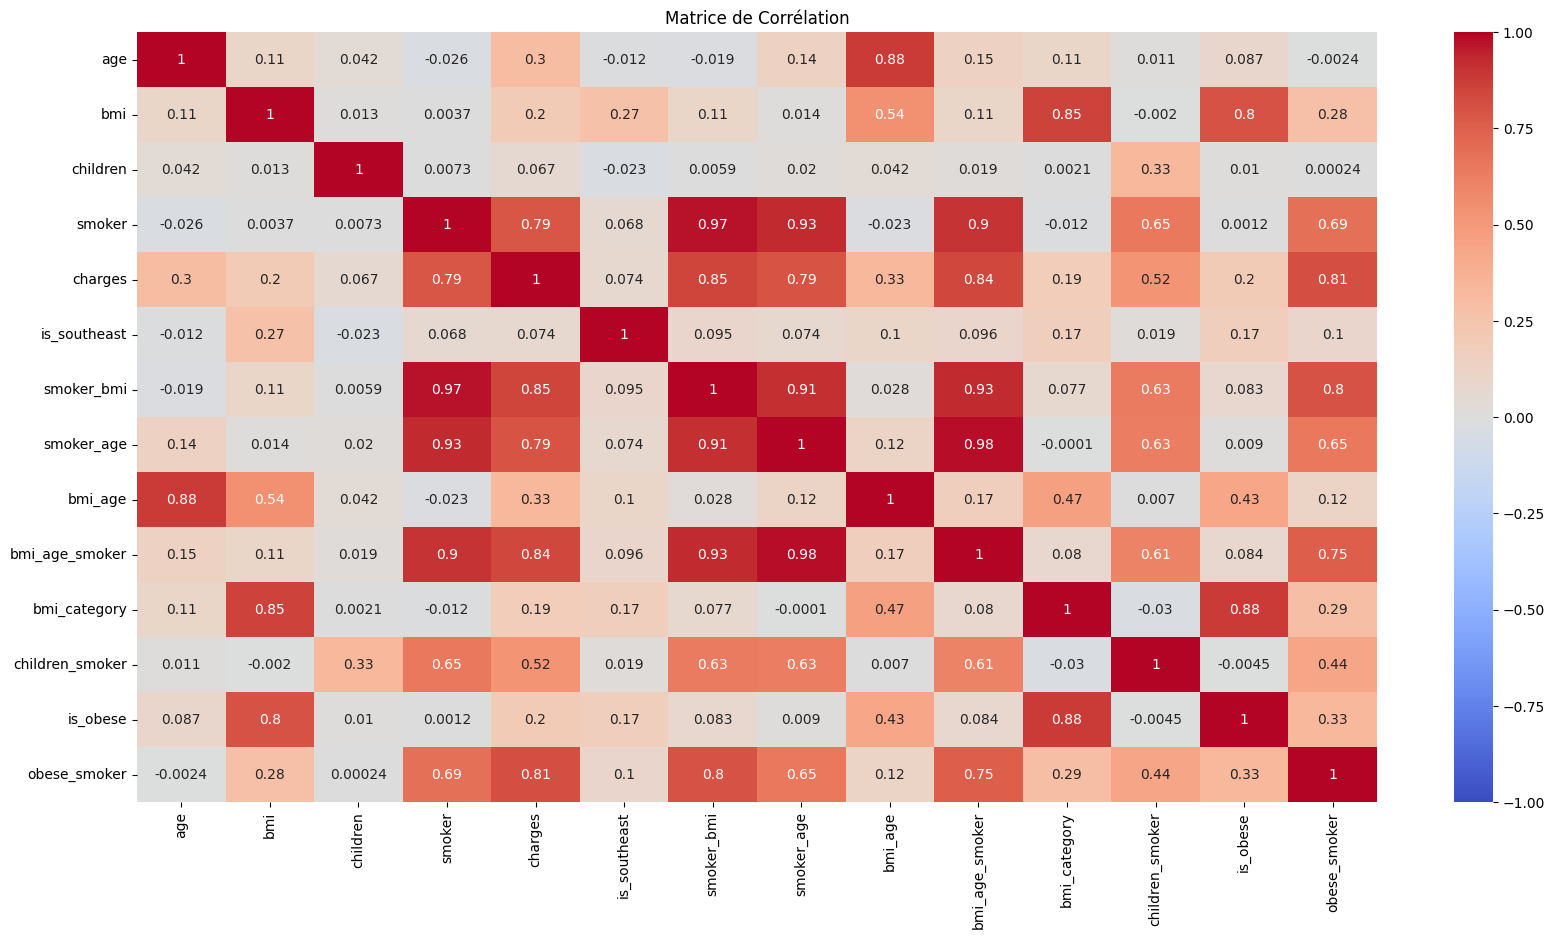

In [109]:
# Calcul de la matrice de corrélation
corr_matrix = df1.corr()

# Heatmap
plt.figure(figsize=(20, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Matrice de Corrélation")
plt.show()

In [110]:
# df1 = df1.drop(columns='is_overweigth')
# df1 = df1.drop(columns='overweight_smoker')
# df1 = df1.drop(columns='obese_southeast')
# # df1 = df1.drop(columns='is_northeast')
# # df1 = df1.drop(columns='is_northwest')
# # df1 = df1.drop(columns='is_southwest')

In [ ]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet

X = df1.drop(columns=['charges'])
y = df1['charges']

X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True, train_size=0.85, random_state=42, stratify=X['smoker'])

linear_model = LinearRegression()
lasso_model = Lasso()
ridge_model = Ridge()
elasticnet_model = ElasticNet()

models = {
    'Linear Regression': linear_model,
    'Lasso': lasso_model,
    'Ridge': ridge_model,
    'ElasticNet': elasticnet_model
}

results = {}
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    results[model_name] = {'RMSE': rmse, 'R²': r2}

for model_name, metrics in results.items():
    print(f"{model_name} - RMSE: {metrics['RMSE']}, R²: {metrics['R²']}")

Linear Regression - RMSE: 3238.8296656189627, R²: 0.9276130109735158
Lasso - RMSE: 3238.541497328151, R²: 0.9276258913711201
Ridge - RMSE: 3240.9435797691185, R²: 0.9275184892897111
ElasticNet - RMSE: 3653.017435317972, R²: 0.9079152347242708


/Users/khadijaaassi/Desktop/Simplon/Projet_devIA/Simplon_Machine_learning/.venv/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.157e+10, tolerance: 1.667e+07
  model = cd_fast.enet_coordinate_descent(


In [102]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet

X = df1.drop(columns=['charges'])
y = df1['charges']

X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True, train_size=0.85, random_state=42, stratify=X['smoker'])

linear_model = LinearRegression()
lasso_model = Lasso()
ridge_model = Ridge()
elasticnet_model = ElasticNet()


models = {
    'Linear Regression': linear_model,
    'Lasso': lasso_model,
    'Ridge': ridge_model,
    'ElasticNet': elasticnet_model
}

results = {}
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    results[model_name] = {'RMSE': rmse, 'R²': r2}

for model_name, metrics in results.items():
    print(f"{model_name} - RMSE: {metrics['RMSE']}, R²: {metrics['R²']:2f}")

Linear Regression - RMSE: 3238.971275460024, R²: 0.927607
Lasso - RMSE: 3238.5296587469893, R²: 0.927626
Ridge - RMSE: 3241.142498910175, R²: 0.927510
ElasticNet - RMSE: 3653.0335882648033, R²: 0.907914


/Users/khadijaaassi/Desktop/Simplon/Projet_devIA/Simplon_Machine_learning/.venv/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.156e+10, tolerance: 1.667e+07
  model = cd_fast.enet_coordinate_descent(


In [103]:
# from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import numpy as np

X = df.drop(columns=['charges'])
y = df['charges']

X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True, train_size=0.85, random_state=42, stratify=X['smoker'])

numeric_features = X.select_dtypes(include=['float64', 'int64']).columns
categorical_features = X.select_dtypes(include=['object']).columns

# Créer le pré-traitement : standardisation pour les variables numériques et encodage pour les variables catégorielles
numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(drop='first')

# Créer le pré-traitement avec un ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

# Créer le pipeline avec le pré-traitement et le modèle de régression linéaire
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('model', LinearRegression())])

# Entraîner le modèle
pipeline.fit(X_train, y_train)

# Prédictions et évaluation
y_pred = pipeline.predict(X_test)

# Calcul du RMSE et du R²
from sklearn.metrics import mean_squared_error, r2_score
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"RMSE: {rmse}, R²: {r2}")

RMSE: 5679.725111536386, R²: 0.7796667986422618
